# Mise en place d'une map évolutive sur les données 2021-2023

In [1]:
! pip install nbformat

In [2]:
%run 'data.ipynb'


Traitement de l'année 2022...
Extraction du fichier ZIP pour l'année 2022
Fichiers extraits pour 2022 :
- rpg-bio-2022-national.gpkg
- ._rpg-bio-2022-national.gpkg

Traitement de l'année 2021...
Extraction du fichier ZIP pour l'année 2021
Fichiers extraits pour 2021 :
- rpg-bio-2021-national.gpkg

Traitement de l'année 2023...
Extraction du fichier ZIP pour l'année 2023
Fichiers extraits pour 2023 :
- rpg-bio-2023-national.gpkg
- rpg-bio-2023-national.prj
- rpg-bio-2023-national.cpg
- rpg-bio-2023-national.shx
- rpg-bio-2023-national.dbf
- rpg-bio-2023-national.shp


/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: /home/onyxia/work/AgricultureBio_France/data_extracted_2023/rpg-bio-2023-national/rpg-bio-2023-national.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Aperçu des données pour 2022 :
       gid  millesime code_culture  \
0  4420687       2022          PPH   
1      333       2022          PTR   
2      337       2022          BTH   
3      464       2022          BTH   
4      480       2022          BTH   

                                         lbl_culture           grp_culture  \
0  Prairie permanente - herbe prédominante (resso...  Prairies permanentes   
1         Autre prairie temporaire de 5 ans ou moins  Prairies temporaires   
2                                 Blé tendre d’hiver            Blé tendre   
3                                 Blé tendre d’hiver            Blé tendre   
4                                 Blé tendre d’hiver            Blé tendre   

   surface_ha code_commune_insee             lbl_commune    code_epci  \
0        0.38              38513                Treffort  200030658.0   
1        2.13              01188                  Illiat  200070118.0   
2        6.10              01136  Cruzilles-lès-Mépi

/opt/conda/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Valeurs uniques de 'code_region' après filtrage pour 2021 :
[84 44 93 32 76 75 11 27 24 52 53 28 94]
Nombre de lignes restantes pour gdf_metropole2021 : 1025777

Valeurs uniques de 'code_region' après filtrage pour 2022 :
[84 27 75 24 32 44 11 93 76 28 53 52 94]
Nombre de lignes restantes pour gdf_metropole2022 : 1081878

Valeurs uniques de 'code_region' après filtrage pour 2023 :
[76 93 27 75 28 84 24 53 44 11 94 52 32]
Nombre de lignes restantes pour gdf_metropole2023 : 1160919

Valeurs uniques de 'code_region' dans gdf2021 :
[84. 44. 93. 32. nan 76. 75. 11. 27. 24. 52. 53. 28. 94.  1.  2.  6.  3.
  4.]
1029200
Valeurs uniques de 'code_region' après filtrage :
[84 44 93 32 76 75 11 27 24 52 53 28 94]
Nombre de lignes restantes : 1025777

Traitement des données pour l'année 2022...
Le nombre total de parcelles bio en métropole pour 2022 est : 1081878
Aperçu des données regroupées par département pour l'année 2022 :
  code_departement  nb_parcelles_bio  ratio_parcelles
0               

## Mise en place du mapping pour chacune des années : 2021/2022/2023

In [4]:
#Chargement de la carte des départements
dept_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_departements = gpd.read_file(dept_url)

In [ ]:
print("Valeurs uniques dans 'gdf_departements[code]':")
print(gdf_departements['code'].unique())

print("Valeurs uniques dans 'gdf_dep[code_departement]':")
print(gdf_dep['code_departement'].unique())


Valeurs uniques dans 'gdf_departements[code]':
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95']
Valeurs uniques dans 'gdf_dep[code_departement]':
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '76' '77' '78' '79' '80' '81' '82'

In [6]:
gdf_departements['geometry'] = gdf_departements['geometry'].simplify(0.01, preserve_topology=True)


In [7]:
gdf_map = gdf_departements.merge(gdf_dep, left_on='code', right_on='code_departement', how='left')

print("Aperçu de gdf_map après fusion :")
print(gdf_map.head())
print(f"Nombre de lignes après fusion : {len(gdf_map)}")



Aperçu de gdf_map après fusion :
  code  nom                                         geometry_x  \
0   01  Ain  POLYGON ((4.78021 46.17668, 4.85276 46.3282, 4...   
1   01  Ain  POLYGON ((4.78021 46.17668, 4.85276 46.3282, 4...   
2   01  Ain  POLYGON ((4.78021 46.17668, 4.85276 46.3282, 4...   
3   01  Ain  POLYGON ((4.78021 46.17668, 4.85276 46.3282, 4...   
4   01  Ain  POLYGON ((4.78021 46.17668, 4.85276 46.3282, 4...   

  code_departement  nb_parcelles_bio  ratio_parcelles  \
0               01            8285.0         0.713659   
1               01            8285.0         0.713659   
2               01            8285.0         0.713659   
3               01            8285.0         0.713659   
4               01            8285.0         0.713659   

                                          geometry_y  
0  POLYGON ((5.4217 46.34553, 5.42178 46.34555, 5...  
1  POLYGON ((5.49376 46.26896, 5.49376 46.26902, ...  
2  POLYGON ((5.4919 46.26807, 5.4921 46.26808, 5....  
3  POLY

In [8]:
gdf_map = gdf_departements.merge(gdf_dep, left_on='code', right_on='code_departement', how='left')

# Vérifiez si 'geometry' est toujours présent
print("Colonnes dans gdf_map après fusion :")
print(gdf_map.columns)


Colonnes dans gdf_map après fusion :
Index(['code', 'nom', 'geometry_x', 'code_departement', 'nb_parcelles_bio',
       'ratio_parcelles', 'geometry_y'],
      dtype='object')


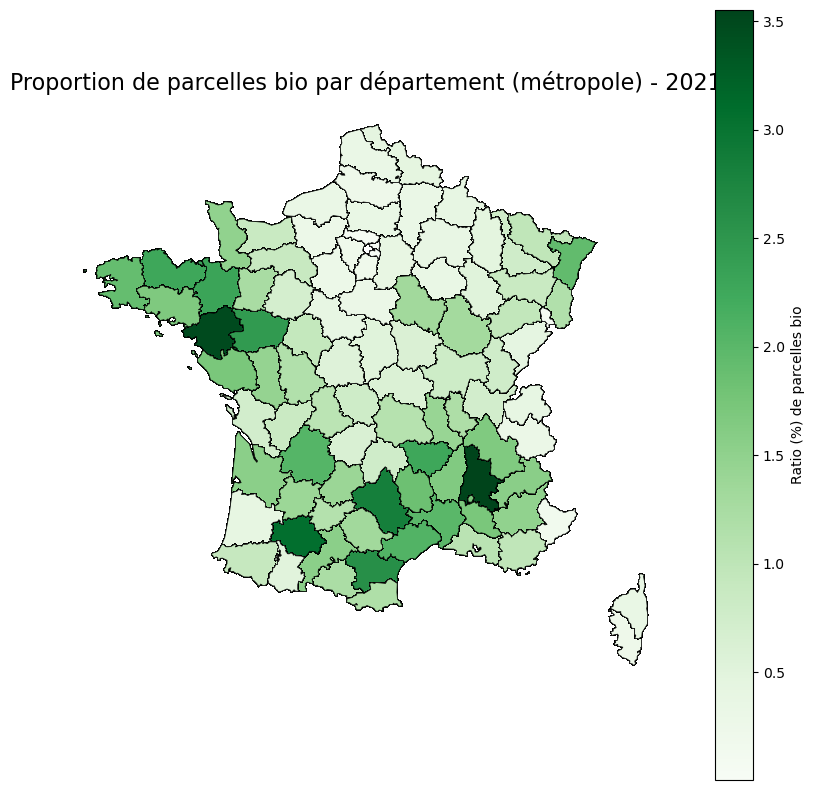

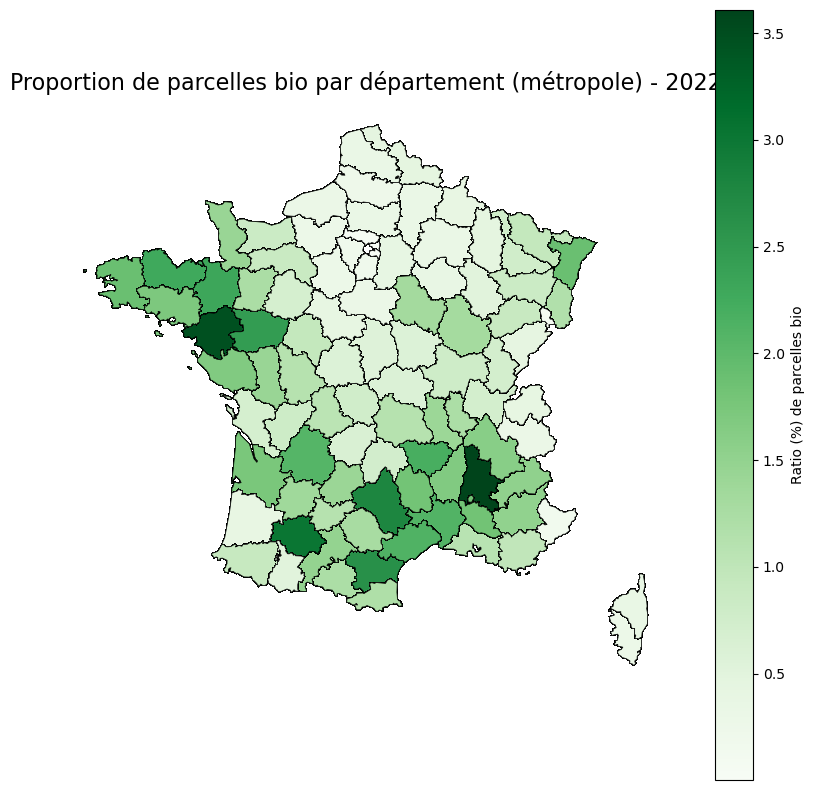

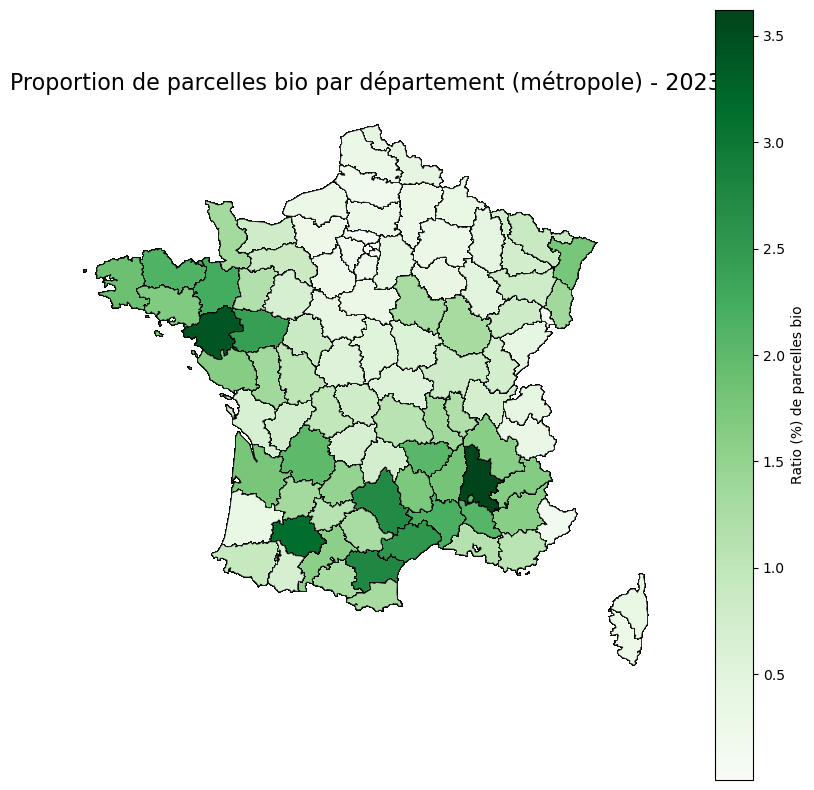

In [11]:
import matplotlib.pyplot as plt

# Simplification des géométries pour accélérer les calculs
gdf_departements['geometry'] = gdf_departements['geometry'].simplify(0.01, preserve_topology=True)

# Fonction pour tracer une carte par année
def plot_map_by_year(year):
    # Récupérer les données pour l'année
    gdf_dep = globals().get(f"gdf_dep{year}")
    
    if gdf_dep is not None:
        # Filtrer les départements pour ne garder que ceux présents dans gdf_dep
        gdf_departements_filtered = gdf_departements[gdf_departements['code'].isin(gdf_dep['code_departement'])]
        
        # Fusionner les départements avec les données de l'année
        gdf_map = gdf_departements_filtered.merge(
            gdf_dep, 
            left_on='code', 
            right_on='code_departement', 
            how='left'
        )
        
        # Choisir la bonne colonne de géométrie
        if 'geometry_x' in gdf_map.columns:
            gdf_map = gdf_map.rename(columns={'geometry_x': 'geometry'}).drop(columns=['geometry_y'])
        elif 'geometry_y' in gdf_map.columns:
            gdf_map = gdf_map.rename(columns={'geometry_y': 'geometry'}).drop(columns=['geometry_x'])
        
        # Définir la colonne de géométrie active
        gdf_map = gdf_map.set_geometry('geometry')
        
        # Créer la carte
        fig, ax = plt.subplots(figsize=(10, 10))
        
        gdf_map.plot(
            column='ratio_parcelles',  # Colonne pour le ratio
            cmap='Greens',            # Palette de couleurs
            legend=True,              # Afficher une légende
            legend_kwds={'label': "Ratio (%) de parcelles bio"},
            ax=ax,
            edgecolor='black',        # Couleur des bordures
            linewidth=0.5             # Largeur des bordures
        )
        
        # Ajouter un titre
        ax.set_title(f"Proportion de parcelles bio par département (métropole) - {year}", fontsize=16)
        
        # Désactiver les axes
        ax.axis('off')
        
        # Afficher la carte
        plt.show()
    else:
        print(f"Les données pour l'année {year} ne sont pas disponibles.")

# Visualiser les cartes pour chaque année
for year in [2021, 2022, 2023]:
    plot_map_by_year(year)


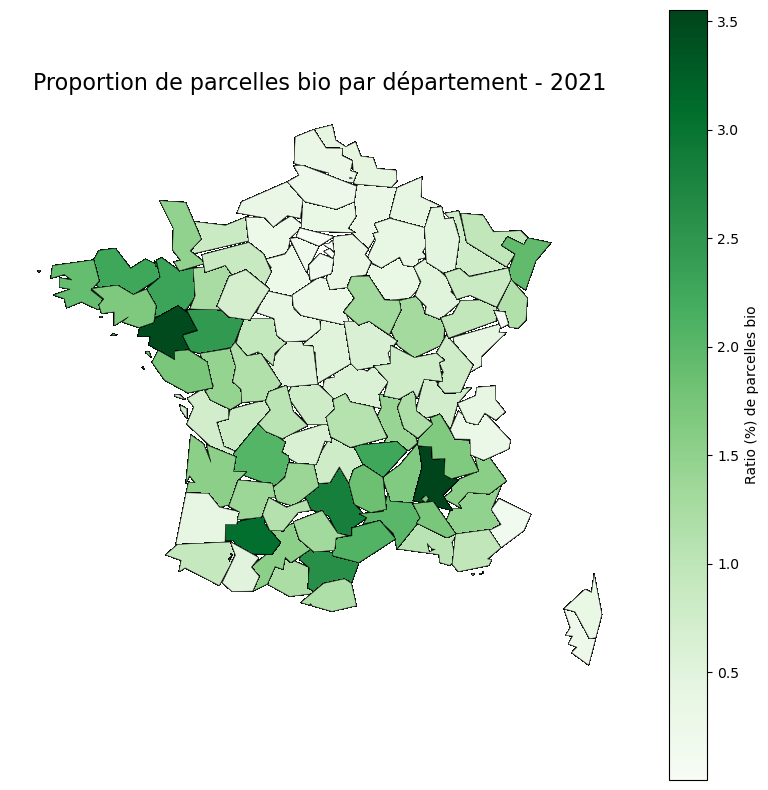

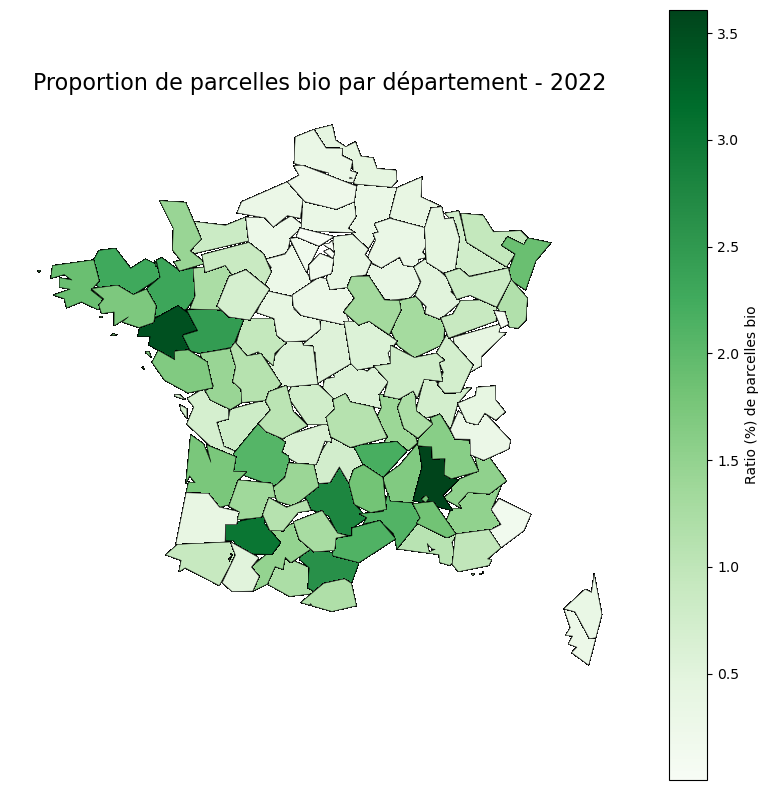

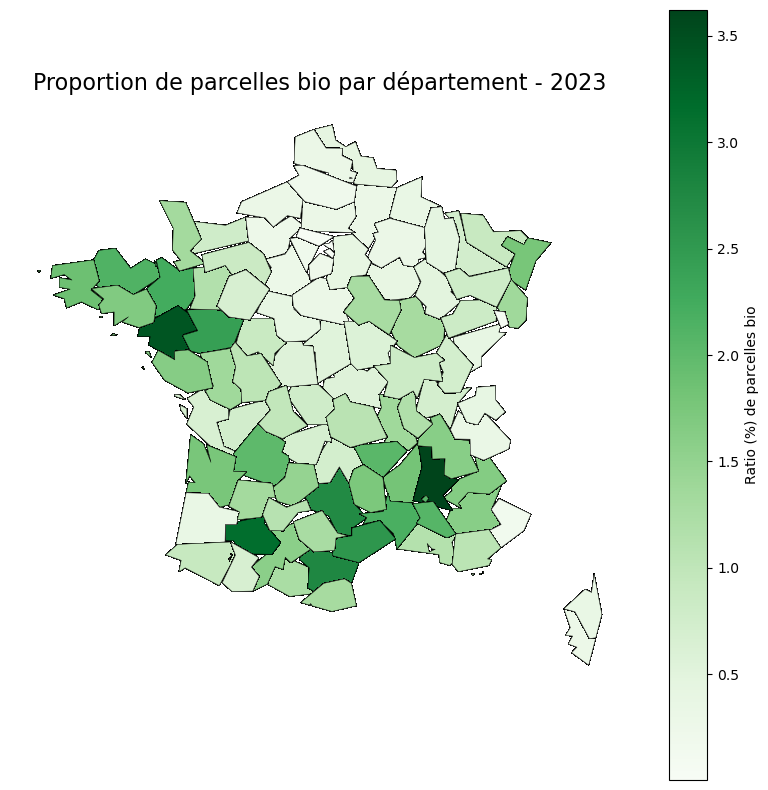

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Simplification des géométries pour accélérer les calculs
gdf_departements['geometry'] = gdf_departements['geometry'].simplify(0.1, preserve_topology=True)

# Fonction pour tracer une carte par année
def plot_map_by_year(year):
    # Récupérer les données pour l'année
    gdf_dep = globals().get(f"gdf_dep{year}")
    
    if gdf_dep is not None:
        # Filtrer les départements pour ne garder que ceux présents dans gdf_dep
        gdf_departements_filtered = gdf_departements[gdf_departements['code'].isin(gdf_dep['code_departement'])]
        
        # Fusionner les départements avec les données de l'année
        gdf_map = gdf_departements_filtered.merge(
            gdf_dep, 
            left_on='code', 
            right_on='code_departement', 
            how='left'
        )
        
        # Choisir la bonne colonne de géométrie
        if 'geometry_x' in gdf_map.columns:
            gdf_map = gdf_map.rename(columns={'geometry_x': 'geometry'}).drop(columns=['geometry_y'])
        elif 'geometry_y' in gdf_map.columns:
            gdf_map = gdf_map.rename(columns={'geometry_y': 'geometry'}).drop(columns=['geometry_x'])
        
        # Définir la colonne de géométrie active
        gdf_map = gdf_map.set_geometry('geometry')
        
        # Créer la carte
        fig, ax = plt.subplots(figsize=(10, 10))
        
        gdf_map.plot(
            column='ratio_parcelles', 
            cmap='Greens', 
            legend=True, 
            legend_kwds={'label': "Ratio (%) de parcelles bio"},
            ax=ax,
            edgecolor='black',        # Couleur des bordures
            linewidth=0.3             # Largeur des bordures réduite
        )
        
        # Ajouter un titre
        ax.set_title(f"Proportion de parcelles bio par département - {year}", fontsize=16)
        
        # Désactiver les axes
        ax.axis('off')
        
        # Afficher la carte
        plt.show()
    else:
        print(f"Les données pour l'année {year} ne sont pas disponibles.")

# Visualiser les cartes pour chaque année
for year in [2021, 2022, 2023]:
    plot_map_by_year(year)


In [8]:
gdf_departements['geometry'] = gdf_departements['geometry'].simplify(0.5, preserve_topology=True)

In [9]:
df_evolution = pd.DataFrame()
for year in [2021, 2022, 2023]:
    df_temp = globals().get(f"gdf_dep{year}")
    if df_temp is not None:
        print(f"Données pour {year} traitées")
    # Ajoutez les calculs par année ici.


Données pour 2021 traitées
Données pour 2022 traitées
Données pour 2023 traitées


In [10]:
gdf_departements.to_file("departements.geojson", driver="GeoJSON")


In [ ]:
import pandas as pd

# Combiner les données et calculer le scoring
def calculate_evolution_and_scoring():
    # Supprimer temporairement la colonne geometry
    df_2021 = gdf_dep2021.drop(columns=['geometry'], errors='ignore')[
        ['code_departement', 'nb_parcelles_bio']].rename(columns={'nb_parcelles_bio': 'parcelles_2021'})
    
    df_2022 = gdf_dep2022.drop(columns=['geometry'], errors='ignore')[
        ['code_departement', 'nb_parcelles_bio']].rename(columns={'nb_parcelles_bio': 'parcelles_2022'})
    
    df_2023 = gdf_dep2023.drop(columns=['geometry'], errors='ignore')[
        ['code_departement', 'nb_parcelles_bio']].rename(columns={'nb_parcelles_bio': 'parcelles_2023'})
    
    # Fusionner les années sur le code_departement
    df_combined = pd.merge(df_2021, df_2022, on='code_departement', how='outer')
    df_combined = pd.merge(df_combined, df_2023, on='code_departement', how='outer')
    
    # Calculer les évolutions du nombre de parcelles bio
    df_combined['evolution_2021_2022'] = df_combined['parcelles_2022'] - df_combined['parcelles_2021']
    df_combined['evolution_2022_2023'] = df_combined['parcelles_2023'] - df_combined['parcelles_2022']
    df_combined['evolution_totale'] = df_combined['parcelles_2023'] - df_combined['parcelles_2021']
    
    # Remplacer les valeurs NaN par 0
    df_combined.fillna(0, inplace=True)
    
    # Calculer un score basé sur l'évolution totale (par exemple, en utilisant les quartiles)
    df_combined['score'] = pd.qcut(df_combined['evolution_totale'], q=4, labels=[1, 2, 3, 4])  # 1: faible évolution, 4: forte évolution
    
    return df_combined

# Calculer les scores
df_scoring = calculate_evolution_and_scoring()

# Afficher un aperçu des résultats
print("Aperçu des scores des départements :")
print(df_scoring[['code_departement', 'evolution_2021_2022', 'evolution_2022_2023', 'evolution_totale', 'score']])
